# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Mehreen Akmal

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [3]:
# TODO: Import dataset and inspect the first five columns
df = pd.read_csv('seeds_dataset.txt',sep='\t',header=None, 
                 names = ["Area", "Perimeter", "Compactness", 
                          "Length of Kernel", "Width of Kernel",  
                          "Asymmetry Coefficient", 
                          "Length of Kernel Groove", "Target"])

df.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [4]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X= df.iloc[:,:-1]
y = df['Target']

print("Shape of training feature", X.shape)
print("Shape of target vector", y.shape)

Shape of training feature (210, 7)
Shape of target vector (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

I would select the StandardScaler because it is the preferred scaler for PCA visualizer. Standard scaler is a common scaler and go to when the features have an approximate normal distribution as it scales by bringing the mean to zero and variance of one. 

Other scalers are selected if the data has certain characteristics, for example robustscaler is used if you have a lot of outliers, MinMaxScaler is used if you need your data to be within a specific range which does not apply to this dataset. 


Before we implement the scaler, we need to split the data into training and testing sets first.

In [5]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
# TODO: Print the shape of the training feature matrix and target vector - ytrain or full?

print("Shape of training feature", X_train.shape)
print("Shape of target vector", y_train.shape)

Shape of training feature (157, 7)
Shape of target vector (157,)


Now that we have our training data, we can implement our selected scaler.

In [7]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaler2 = StandardScaler()
scaled_X_test = scaler2.fit_transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [8]:
# TODO: Instantiate model

from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [9]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [10]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

grid = GridSearchCV(model_LR, param_grid, cv = 5)
grid.fit(scaled_X_train, y_train)
grid.best_params_
print(f'Best parameters {grid.best_params_}')
print(f'Cross-Validation accuracy {grid.best_score_:.3f}')
print(f'Test accuracy {grid.score(scaled_X_test, y_test):.3f}')

Best parameters {'C': 10.0, 'fit_intercept': True}
Cross-Validation accuracy 0.937
Test accuracy 0.943


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [11]:
# TODO: Predict y labels using best estimator
model = grid.best_estimator_
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

In [12]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA

# Instantiate the PCA model
pca = PCA(n_components=2) 

# Fit the model to the scaled data
pca_1 = pca.fit(scaled_X_train)
pca_result = pca.transform(scaled_X_test)

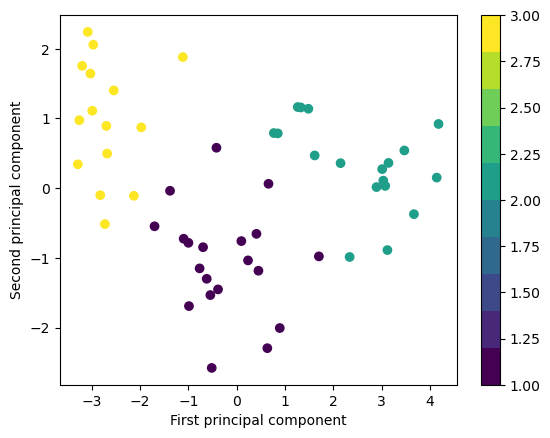

In [13]:
# TODO: Plot test points colored by predicted label

# Visualize the first two principal components
plt.scatter(pca_result[:, 0],
            pca_result[:, 1],
            c=y_pred,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar(); 

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*


1. Yes, the logistic regression model worked well for this model because the cross-validate accuracy and testing accuracy are both high and around the same value of 0.94. Therefore, this means there  is low variance and low bias. 

2. Yes, PCA worked well for this model as in the plot the clusters appear to be well defined with no overlaps. Since the model used is linear and resulted in good results. PCA also works well for linear models. This indicates that the seed dataset is likely linear. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I sourced my code from the classnotes, class example jupyter notebooks and lab exercises. 
2. I reviewed the class notes and then started the assignment and completed it in the steps provided. For scaling, since we split the data first - I scaled the test and train dataset seperately. 
3. I did not use generative AI for this assignment. 
4. I did not face any challenges with this section as the notes were a good tool to refer to when I was confused.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [14]:
# TODO: Scale feature matrix
from sklearn.preprocessing import StandardScaler

#Instantiate the scaler  
scaler = StandardScaler()

#fit and transform scaler to data
df_scaled = scaler.fit_transform(X)

#df_scaled = X
#scaler.fit(df_scaled)
#df_scaled = pd.DataFrame(scaler.transform(df_scaled), columns=df_scaled.columns)


The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

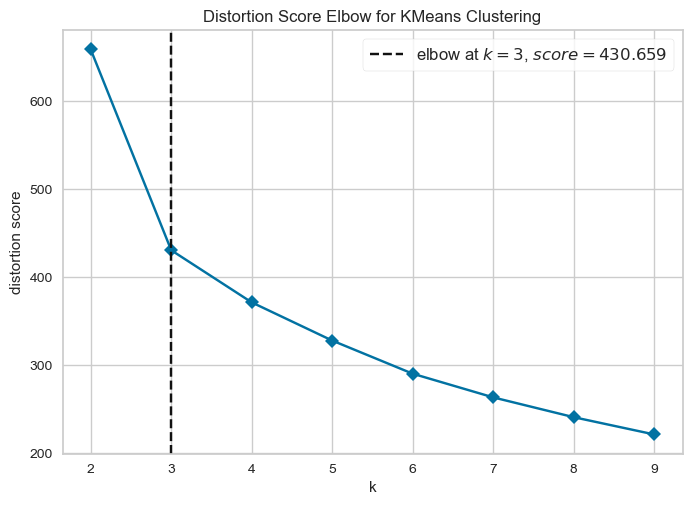

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, n_init=10, random_state=54),
                 k=(2, 10), timings=False)

In [15]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans

from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=54, n_init=10), df_scaled,k=(2,10), 
                  metric='distortion',
                 timings=False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [16]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=3, random_state=54, n_init=10)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=10, random_state=54)

In [30]:
# TODO: Calculate the three different validation metrics

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

silhouette = silhouette_score(df_scaled, kmeans.labels_ )
print("The Silhouette Score is", silhouette)

calinski_harabasze = calinski_harabasz_score(df_scaled, kmeans.labels_ )
print("The Calinski-Harabasz score is", calinski_harabasze)

davies_bouldin = davies_bouldin_score(df_scaled, kmeans.labels_ )
print("The Davies Bouldin score is", davies_bouldin)



The Silhouette Score is 0.40012008031246116
The Calinski-Harabasz score is 249.58688875811828
The Davies Bouldin score is 0.9300117268480377


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

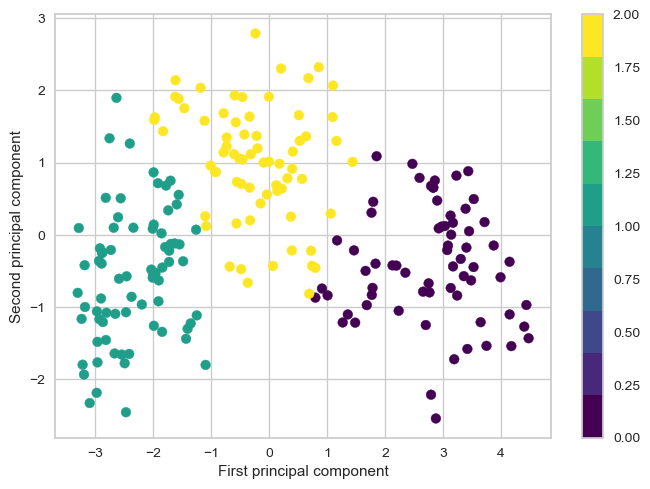

In [28]:
# TODO: Plot clustering results

pca = PCA(n_components=2) 

# Fit the model to the scaled data
pca_result = pca.fit_transform(df_scaled)

# Visualize the first two principal components
plt.scatter(pca_result[:, 0],
            pca_result[:, 1],
            c=kmeans.labels_,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar();

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [22]:
# TODO: Find the number of principal components using explained variance ratio

pca=PCA(0.95).fit(df_scaled) 
pca.n_components_
print("The number of components required to explain at least 95% of the varaince is ", pca.n_components_)

The number of components required to explain at least 95% of the varaince is  3


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [23]:
# TODO: Use PCA to transform the data
pca=PCA(n_components=3).fit(df_scaled)
df_pca = pca.transform(df_scaled)

In [24]:
# TODO: Implement K-means with the transformed data

kmeans = KMeans(n_clusters=3, random_state=54, n_init=10)
kmeans.fit(df_pca)

KMeans(n_clusters=3, n_init=10, random_state=54)

In [25]:
# TODO: Calculate the three different validation metrics

silhouette2 = silhouette_score(df_pca, kmeans.labels_ )
print("The Silhouette Score is", silhouette)

calinski_harabasze2 = calinski_harabasz_score(df_pca, kmeans.labels_ )
print("The Calinski-Harabasz score is", calinski_harabasze)

davies_bouldin2 = davies_bouldin_score(df_pca, kmeans.labels_ )
print("The Davies Bouldin score is", davies_bouldin)

The Silhouette Score is 0.4088533197603694
The Calinski-Harabasz score is 260.20226181768174
The Davies Bouldin score is 0.9056643680171858


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [26]:
# TODO: Display results
results = pd.DataFrame(columns=["Silhouette Score", "Calinski-Harabasz","Davies Bouldin score" ])
for data in [df_scaled, df_pca]:
    sil = silhouette = silhouette_score(data, kmeans.labels_ )
    cal = calinski_harabasze = calinski_harabasz_score(data, kmeans.labels_ )
    davies = davies_bouldin_score(data, kmeans.labels_ )
    results.loc[len(results.index)] = [sil, cal, davies]

results.index = ["Cluster using Original Data", "Cluster using PCA-transformed data"]
pd.set_option('display.precision', 3)
results


,Silhouette Score,Calinski-Harabasz,Davies Bouldin score
Cluster using Original Data,0.400,249.587,0.930
Cluster using PCA-transformed data,0.409,260.202,0.906


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

1. The optimal number of clusters determined from the elbow method was 3. This makes sense based on the context as from part 1 we know that this dataset has 3 labels. 
2. Yes, we got similar results. The two plots have similar distribution of data points and clusters. 
3. 
     I used 3 components for the PCA analysis as this is the number of componenets that explained vairance of 95%. Yes using PCA improved the results slightly. 

     Using PCA improved the results slightly:
      - Silhoutte Score measures how well-seperated clusters are. The best score is 1 - Silhoutte score sligthly increased which indicates slight improvement in cluster seperation. 
     - The Caliniski-Harabasz score is a ratio of between-cluster variance to within cluster variance. Therefore, a higher value indicates better defined clusters. The score for PCA transformed data is higher - hence more well defined clusters.
     - Davies Bouldin score ranges between 0 to 1 and measures the compactness and seperation of clusters.The best score for this is values closer to 0. For PCA this metric decreased slightly. 



### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I sourced my code from the classnotes, juptyer example notebooks and lab exercises. 
2. I reviewed the class notes and labs while completing the steps in the order presented in this assignment. 
3. I used generative AI for this one prompt "what is the difference between kmeans.label and y_pred=kmeans.predict(X) ? ". No, I didn't modify my code I had used kmeans.label in my PCA plot and this clarified the difference between the two. I used AI to further my understanding. 
4. I found it a little bit challenging doing the problems related to PCA transformed data. It is a concept I found a bit tricky to wrap my head around. 

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I enjoyed making the plots as I found it to be a good way to visualize and understand the dataset. I found PCA a bit confusing but with the exercises understood it more. 